# Simple gravity network

Consider the simple gravity network represented in the figure below:

In [1]:
import numpy as np
from IPython.display import Image as img

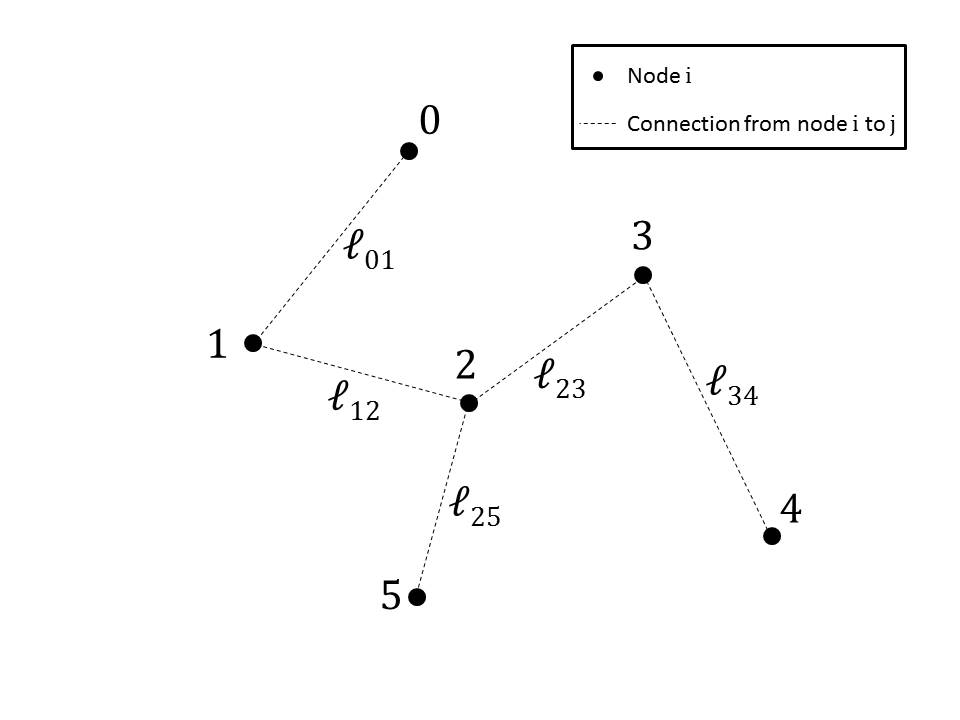

In [2]:
img('grav_net.jpg', width=700)

This network is formed by 6 nodes and 5 connections. The nodes represent points on the Earth's surface. Consider that, at each node $i$, $i = 0, \dots, 5$, there is a gravity value $g_{i}$. Moreover, consider that the gravity values at the nodes $0$ and $5$ are known and that, on each connection (dashed lines), there is a differential gravity measurement $\ell_{ij}$ defined by:

$$
\ell_{ij} = g_{j} - g_{i} \: , \quad j \ne i \: .
$$

In this case, we have the following equations for the differential gravity measurements:

$$
\begin{split}
\ell_{01} &= g_{1} - g_{0} \\
\ell_{12} &= g_{2} - g_{1} \\
\ell_{25} &= g_{5} - g_{2} \\
\ell_{34} &= g_{4} - g_{3} \\
\ell_{23} &= g_{3} - g_{2}
\end{split} \: ,
$$

and the following equations for the known gravity values:

$$
\begin{split}
g_{0} &= \tilde{g}_{0} \\
g_{5} &= \tilde{g}_{5}
\end{split} \: ,
$$

where $\tilde{g}_{0}$ and $\tilde{g}_{5}$ represent, respectively, the known gravity values at the nodes $0$ and $5$.

Notice that, by defining a vector $\mathbf{g}$ containing the gravity values at each node, e.g.,

$$
\mathbf{g} = \left[ \begin{array}{c}
g_{0} \\
g_{1} \\
g_{2} \\
g_{3} \\
g_{4} \\
g_{5}
\end{array} \right] \: ,
$$

and another vector $\mathbf{d}$ defined as follows:

$$
\mathbf{d} = \left[ \begin{array}{c}
\ell_{01} \\
\ell_{12} \\
\ell_{25} \\
\ell_{34} \\
\ell_{23} \\
\tilde{g}_{0} \\
\tilde{g}_{5}
\end{array} \right] \: ,
$$

it is possible to estimate the gravity values at all nodes by solving a linear system $\mathbf{A} \, \mathbf{g} = \mathbf{d}$.

### Exercise 21

1. Simulate the simple gravity network represented above. First, simulate the parameter vector $\mathbf{g}$ containing the gravity values at all nodes.

2. Create the matrix $\mathbf{A}$ and the data vector $\mathbf{d}$.

3. Create a function `grav_net` that receives $\mathbf{A}$ and $\mathbf{g}$ and returns the parameter vector $\mathbf{g}$ by applying the Least Squares Estimator.

4. Use the `code-template.ipynb` and compare the estimated parameter vector with the simulated parameter vector by using the routine  `numpy.allclose`.

#### Simulating a simple gravity network

The cell below uses the routine [`numpy.random.normal`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) for simulating the parameter vector containing the gravity values at all nodes of our simple gravity network.

In [3]:
N = 6 #number of nodes

g0 = 979000.0 # gravity reference value in mGal

delta_g = 200.0 # gravity variation in mGal

g = np.random.normal(loc=0., scale=delta_g, size=N) # simulated parameter vector

In [4]:
for i, gi in enumerate(g):
    print 'node %d: g%d = %10.5f mGal' % (i, i, g[i])

node 0: g0 = -113.53597 mGal
node 1: g1 = -116.46866 mGal
node 2: g2 =  162.24997 mGal
node 3: g3 =  -65.75842 mGal
node 4: g4 =  -18.65704 mGal
node 5: g5 = -313.76763 mGal
